In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
IceCream=pd.read_csv('IceCreamData.csv')
print(IceCream)

     Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]


In [4]:
IceCream.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [6]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [7]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
X = IceCream[['Temperature']]
y = IceCream['Revenue']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
regressor =LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)

LinearRegression()

In [11]:
print('Linear Model Coeff (m) =' , regressor.coef_)  #value of slope
print('Linear Model Coeff (b) =' , regressor.intercept_)    #value of constant

Linear Model Coeff (m) = [21.5133908]
Linear Model Coeff (b) = 43.73357869209326


In [16]:
y_predict=regressor.predict(X_test)
print(y_predict)

[698.3385558  653.32331149 664.73027451 450.5192845  665.47469743
 441.36861407 584.06540609 623.82532723 667.48717467 468.72433832
 546.82733151 443.41191785 622.95162777 377.64639971 367.0607334
 945.67057977 893.79551974 694.45445099 546.05047608 420.58523672
 391.08500303 597.0141581  283.23582775 655.50055011 380.98796154
 412.31810124 371.05055651 510.23910289 479.70270426 456.68206658
 640.1157508  281.65224383 314.1894674  470.01363777 559.72453055
 539.75091165 307.72368191 508.65180339 571.43237276 732.25599161
 440.44010989 494.39422767 567.56536766 443.94181482 914.46632525
 603.19341879 541.83315574 199.94980451 694.04258508 351.09960842
 189.49123987 576.80689646 216.55393778 468.15141951 461.80905978
 448.43970076 494.89418532 801.3758273  331.24527072 540.42751209
 661.1953557  526.66690494 360.66507037 451.46656256 621.57729407
 254.83395119 290.1749214  525.5900171  656.68802152 663.1062835
 740.96627734 184.48524774 593.42653041 148.41501952 485.97744998
 611.0362480

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand (Training)')

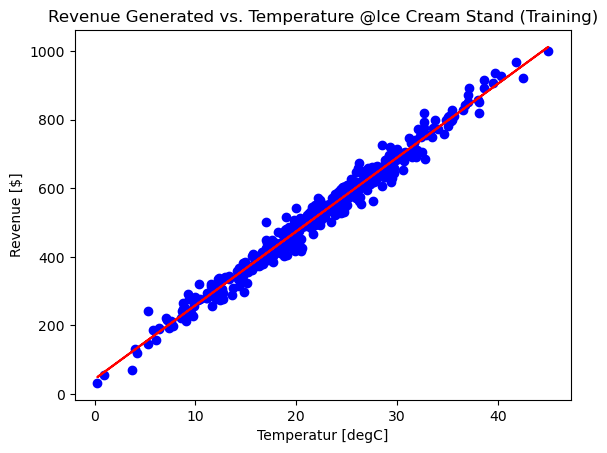

In [13]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperatur [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand (Training)')

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand (Training)')

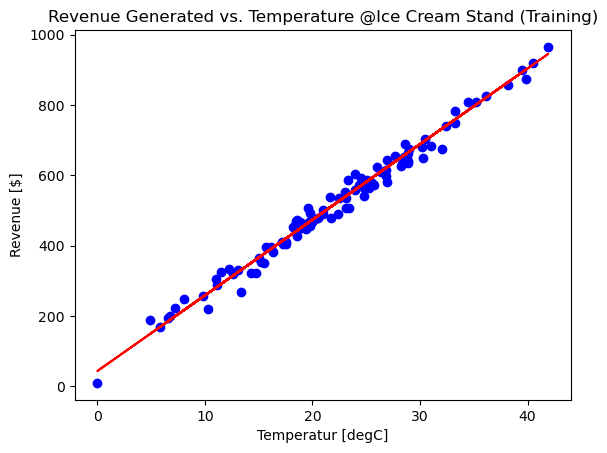

In [14]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,regressor.predict(X_test),color='red')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperatur [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand (Training)')

In [15]:
# Prediction the revenve using Temperature Value directly
print('---------0---------')
Temp = -0
Revenue = regressor.predict([[Temp]])
print(Revenue)
print('--------35----------')
Temp = 35
Revenue = regressor.predict([[Temp]])
print(Revenue)
print('--------55----------')
Temp = 55
Revenue = regressor.predict([[Temp]])
print(Revenue)

---------0---------
[43.73357869]
--------35----------
[796.70225678]
--------55----------
[1226.97007282]


c:\Users\FLEX\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\FLEX\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\FLEX\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
import numpy as np

# Assuming y_predict contains probabilities or continuous values
threshold = 0.5  # Threshold for binary classification, adjust as needed

# Convert probabilities to class labels
y_pred_binary = np.where(y_predict > threshold, 1, 0)

# Now y_pred_binary contains discrete class labels (0 or 1)


In [31]:
# Assuming y_predict contains probabilities for multiclass classification
y_pred_multiclass = np.argmax(y_predict, axis=0)

# Now y_pred_multiclass contains the index of the class with the highest probability for each sample


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test, y_predict)
print('Mean Absolute Error:', mae)

# Calculate MSE
mse = mean_squared_error(y_test, y_predict)
print('Mean Squared Error:', mse)

# Calculate R2 score
r2 = r2_score(y_test, y_predict)
print('R-squared:', r2)
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error: 18.303213530102884
Mean Squared Error: 528.2150684519337
R-squared: 0.9837324255882577
Root Mean Squared Error (RMSE): 22.982929936192505


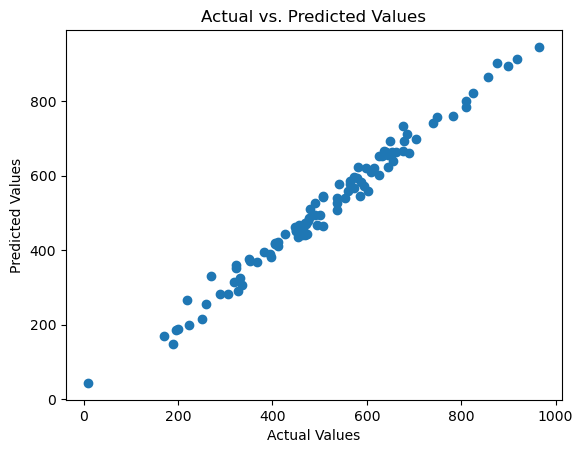

In [39]:
plt.scatter(y_test, y_predict)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
